In [1]:
from sklearn import tree
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import re
from nltk.stem import WordNetLemmatizer

#for Coin value
from pycoingecko import CoinGeckoAPI
import json
from pandas import json_normalize
cg = CoinGeckoAPI()
gecko_list = [
    "bitcoin",
    "ethereum",
    "dogecoin"
]

In [2]:
# doge = pd.read_csv(os.path.join("data", "doge.csv"))
# doge = doge.rename(columns={"Datetime":"date"})
# doge['date'] = pd.to_datetime(doge['date'])
# doge['date'] = doge['date'].dt.strftime('%Y-%m-%d')
# doge

doge = pd.read_csv(os.path.join("", "Data", "doge.csv"))
doge = doge.rename(columns={"Datetime":"date"})
doge

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp
0,0,2022-05-01,"['btc', 'eth', 'doge', 'en', 'best', 'discord'...",0.078,0.578,0.344,0.8481
1,1,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'jamie...",0.000,1.000,0.000,0.0000
2,2,2022-05-01,"['1', 'eth', '1429', 'tweet', '2', 'btc', '103...",0.000,1.000,0.000,0.0000
3,3,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'carpe...",0.000,1.000,0.000,0.0000
4,4,2022-05-01,"['264', '600', '000', '000', 'x', '7', '55', '...",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
38593,38593,2022-05-16,"['cb', 'doge', 'elonmusk', 'goal', 'one', 'day...",0.000,1.000,0.000,0.0000
38594,38594,2022-05-16,"['know', 'tough', 'dwac', 'tsla', 'bb', 'doge'...",0.176,0.824,0.000,-0.1280
38595,38595,2022-05-16,"['doge', '0', '09311', '0', '09201', '0', '089...",0.000,1.000,0.000,0.0000
38596,38596,2022-05-16,"['btc', 'price', '31', '319', 'eth', 'price', ...",0.000,1.000,0.000,0.0000


In [3]:
doge_neg = doge[doge['negative'] > 0.2]
doge_pos = doge[doge['positive'] > 0.2]

In [4]:
doge_pos

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp
0,0,2022-05-01,"['btc', 'eth', 'doge', 'en', 'best', 'discord'...",0.078,0.578,0.344,0.8481
14,14,2022-05-01,"['elonmusk', 'billym2k', 'dogecoin', 'part', '...",0.000,0.750,0.250,0.2500
25,25,2022-05-01,"['gate', 'io', 'ye', 'good', 'result', 'doge']",0.000,0.633,0.367,0.4404
35,35,2022-05-01,"['dogememegirl', 'dogecoin', 'know', 'also', '...",0.000,0.690,0.310,0.4019
37,37,2022-05-01,"['next', 'kiba', 'mri', 'doge', 'arriv', 'kind...",0.000,0.790,0.210,0.7269
...,...,...,...,...,...,...,...
38554,38554,2022-05-16,"['doge', 'overbought', 'short', 'signal', 'suc...",0.000,0.693,0.307,0.7964
38569,38569,2022-05-16,"['elon', 'musk', 'forese', 'huge', 'use', 'cas...",0.000,0.713,0.287,0.8934
38579,38579,2022-05-16,"['btc', 'eth', 'doge', 'sol', 'best', 'discord...",0.078,0.578,0.344,0.8481
38584,38584,2022-05-16,"['btc', 'luna', 'spi', 'doge', 'twtr', 'stockm...",0.000,0.769,0.231,0.5106


In [5]:
print(len(doge_neg))
print(len(doge_pos))

1591
5758


In [6]:
positive = doge_pos['cleaned']

from matplotlib import pyplot as plt
from wordcloud import WordCloud 

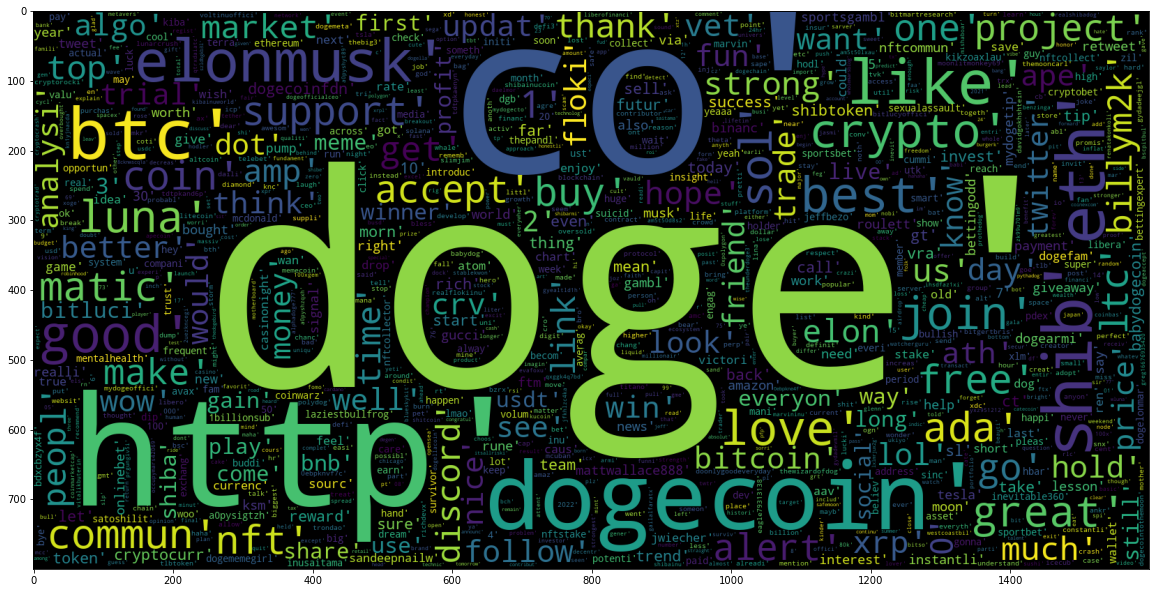

In [166]:
positive = doge_pos['cleaned']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive))
plt.imshow(wc)

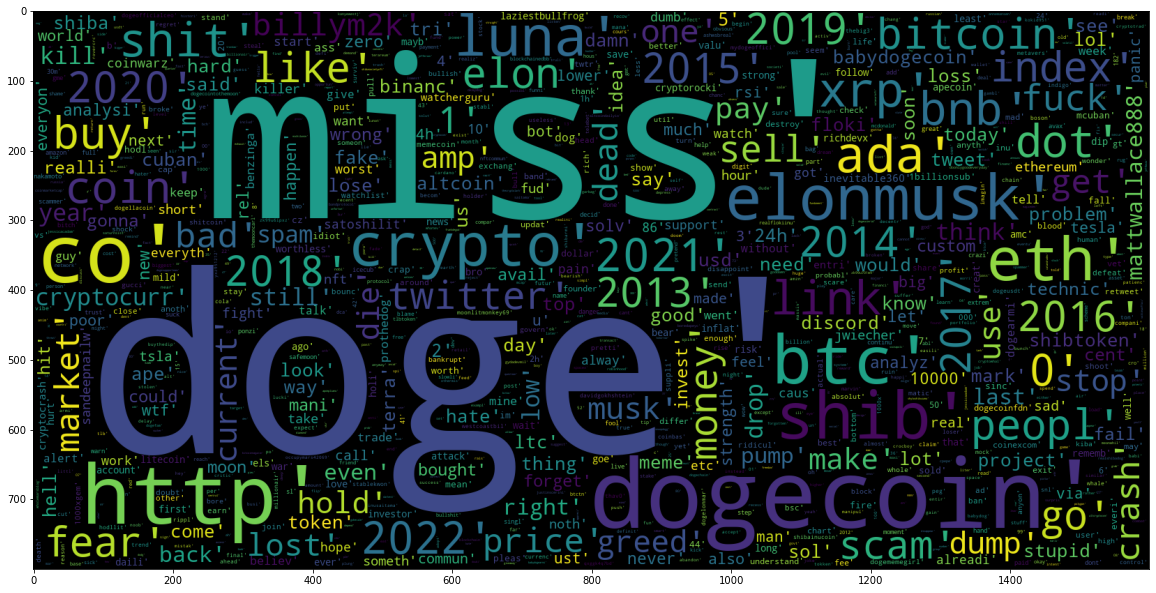

In [167]:
negative = doge_neg['cleaned']
plt.figure(figsize = (20,20))
wc2 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative))
plt.imshow(wc2)

In [7]:
##asigning value to positive, negative and neutral, negative(0), neutral(1), positive(2)
sentiment0=[]
for i in range(len(doge)):
    if doge.loc[i,'negative']>0:
        sentiment0+=[0]
    elif doge.loc[i,'positive']>0:
        sentiment0+=[2]        
    else:
        sentiment0+=[1]     

In [8]:
doge['sentiment']=sentiment0
doge['sentiment'].value_counts()

doge.head()

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp,sentiment
0,0,2022-05-01,"['btc', 'eth', 'doge', 'en', 'best', 'discord'...",0.078,0.578,0.344,0.8481,0
1,1,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'jamie...",0.000,1.000,0.000,0.0000,1
2,2,2022-05-01,"['1', 'eth', '1429', 'tweet', '2', 'btc', '103...",0.000,1.000,0.000,0.0000,1
3,3,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'carpe...",0.000,1.000,0.000,0.0000,1
4,4,2022-05-01,"['264', '600', '000', '000', 'x', '7', '55', '...",0.000,1.000,0.000,0.0000,1


In [9]:
target = doge["cleaned"]
target_names = doge[["sentiment"]]

# This section is to extract the value of Ethereum (plus Dodge and Bitcoin)

In [10]:
df_cryptocurrency = pd.concat(frame_list, axis=1)

NameError: name 'frame_list' is not defined

In [12]:
crypto = pd.read_csv(os.path.join("Data", "price.csv"))

In [13]:
crypto['Change DOGE'] = crypto.dogecoin_price - crypto.dogecoin_price.shift(1)
crypto

,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,date,bitcoin_volume,ethereum_volume,dogecoin_volume,Change DOGE
0,0,14884.979992,328.653136,0.003901,2020-05-19,5.967659e+10,2.045635e+10,3.159139e+08,NaN
1,1,14922.865925,326.538524,0.003891,2020-05-20,5.668974e+10,1.561838e+10,1.867668e+08,-0.000009
2,2,14452.798040,318.473767,0.003781,2020-05-21,5.283982e+10,1.582295e+10,1.764923e+08,-0.000111
3,3,13795.940128,302.899061,0.003681,2020-05-22,5.476526e+10,1.234986e+10,2.064283e+08,-0.000099
4,4,13971.494350,315.525952,0.003858,2020-05-23,4.238211e+10,1.627442e+10,2.184323e+08,0.000176
...,...,...,...,...,...,...,...,...,...
725,725,42267.741872,2898.843244,0.127568,2022-05-14,1.031672e+11,3.457985e+10,1.679408e+09,0.006748
726,726,43534.739233,2976.736395,0.129823,2022-05-15,3.714673e+10,2.075952e+10,9.658377e+08,0.002255
727,727,45069.769903,3089.689306,0.134079,2022-05-16,3.302329e+10,2.071565e+10,7.538429e+08,0.004257
728,728,42910.751665,2905.144652,0.126187,2022-05-17,4.075195e+10,2.877878e+10,7.785160e+08,-0.007892


In [14]:
crypto['Doge Up/Down'] = np.where(crypto['Change DOGE']>0, 1, 0)
crypto

,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,date,bitcoin_volume,ethereum_volume,dogecoin_volume,Change DOGE,Doge Up/Down
0,0,14884.979992,328.653136,0.003901,2020-05-19,5.967659e+10,2.045635e+10,3.159139e+08,NaN,0
1,1,14922.865925,326.538524,0.003891,2020-05-20,5.668974e+10,1.561838e+10,1.867668e+08,-0.000009,0
2,2,14452.798040,318.473767,0.003781,2020-05-21,5.283982e+10,1.582295e+10,1.764923e+08,-0.000111,0
3,3,13795.940128,302.899061,0.003681,2020-05-22,5.476526e+10,1.234986e+10,2.064283e+08,-0.000099,0
4,4,13971.494350,315.525952,0.003858,2020-05-23,4.238211e+10,1.627442e+10,2.184323e+08,0.000176,1
...,...,...,...,...,...,...,...,...,...,...
725,725,42267.741872,2898.843244,0.127568,2022-05-14,1.031672e+11,3.457985e+10,1.679408e+09,0.006748,1
726,726,43534.739233,2976.736395,0.129823,2022-05-15,3.714673e+10,2.075952e+10,9.658377e+08,0.002255,1
727,727,45069.769903,3089.689306,0.134079,2022-05-16,3.302329e+10,2.071565e+10,7.538429e+08,0.004257,1
728,728,42910.751665,2905.144652,0.126187,2022-05-17,4.075195e+10,2.877878e+10,7.785160e+08,-0.007892,0


# Calculate the where the average sentiment overall per day was positive or negative and combine with the ETH table on price going up/down

In [15]:
doge_sentiment = doge.groupby('date')['sentiment'].mean()
doge_sentiment = doge_sentiment.reset_index()
doge_sentiment

,date,sentiment
0,2022-05-01,1.183859
1,2022-05-02,1.180728
2,2022-05-03,1.198509
3,2022-05-04,1.195354
4,2022-05-05,1.198593
5,2022-05-06,1.212926
6,2022-05-07,1.248668
7,2022-05-08,1.221366
8,2022-05-09,1.165517
9,2022-05-10,1.170865


In [16]:
doge_sentiment['sentiment'] = np.where(doge_sentiment['sentiment']>0, 1, 0)

In [17]:
doge_sentiment_move = pd.merge(doge_sentiment, crypto,how='outer', on='date')
doge_sentiment_move

,date,sentiment,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,bitcoin_volume,ethereum_volume,dogecoin_volume,Change DOGE,Doge Up/Down
0,2022-05-01,1.0,712,53518.018858,3874.650573,0.180779,2.965347e+10,1.785574e+10,1.206468e+09,-0.010366,0
1,2022-05-02,1.0,713,54531.860549,4008.085357,0.188247,3.517429e+10,2.050259e+10,1.306821e+09,0.007468,1
2,2022-05-03,1.0,714,54709.645087,4059.288782,0.186066,4.231498e+10,2.511270e+10,1.018619e+09,-0.002181,0
3,2022-05-04,1.0,715,53180.614016,3921.344785,0.182778,3.249291e+10,1.806705e+10,7.256790e+08,-0.003288,0
4,2022-05-05,1.0,716,54702.555595,4053.948028,0.187391,4.374783e+10,2.388912e+10,1.048635e+09,0.004613,1
...,...,...,...,...,...,...,...,...,...,...,...
725,2022-04-28,NaN,709,55065.007792,4055.141032,0.196816,3.953337e+10,2.390808e+10,2.331428e+09,0.003575,1
726,2022-04-29,NaN,710,55920.083463,4126.958405,0.193107,4.430150e+10,2.568311e+10,1.445039e+09,-0.003709,0
727,2022-04-30,NaN,711,54692.422322,3986.886240,0.191145,3.927942e+10,2.533325e+10,1.988504e+09,-0.001962,0
728,2022-05-17,NaN,728,42910.751665,2905.144652,0.126187,4.075195e+10,2.877878e+10,7.785160e+08,-0.007892,0


# Sentiment Analysis - Starts Here

In [18]:
# Plotting the distribution for dataset.
ax = doge1.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(doge1['cleaned']), list(doge1['sentiment'])
#plt.savefig("images/doge_sent_dist.png")

NameError: name 'doge1' is not defined

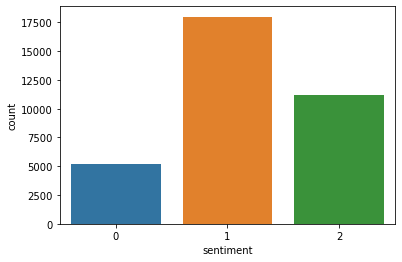

In [179]:
import seaborn as sns
sns.countplot(x='sentiment', data=doge1)
plt.savefig("images/doge_sent_dist2.png")

In [207]:
data = doge[['cleaned', 'sentiment']]
data

,cleaned,sentiment
0,"['btc', 'eth', 'doge', 'en', 'best', 'discord'...",0
1,"['selenaroyf', 'polydog', 'metapetzai', 'jamie...",1
2,"['1', 'eth', '1429', 'tweet', '2', 'btc', '103...",1
3,"['selenaroyf', 'polydog', 'metapetzai', 'carpe...",1
4,"['264', '600', '000', '000', 'x', '7', '55', '...",1
...,...,...
38593,"['cb', 'doge', 'elonmusk', 'goal', 'one', 'day...",1
38594,"['know', 'tough', 'dwac', 'tsla', 'bb', 'doge'...",0
38595,"['doge', '0', '09311', '0', '09201', '0', '089...",1
38596,"['btc', 'price', '31', '319', 'eth', 'price', ...",1


In [208]:
data['sentiment'].unique()

array([0, 1, 2])

In [209]:
#Separating the postivie and negative tweets
data_pos = data[data['sentiment'] == 2]
data_neg = data[data['sentiment'] == 0]

In [210]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [211]:
dataset = pd.concat([data_pos, data_neg])
dataset

,cleaned,sentiment
13,"['support', 'us', 'patreon', 'http', 'co', 'ft...",2
14,"['elonmusk', 'billym2k', 'dogecoin', 'part', '...",2
17,"['38', '335', '200', 'worth', 'doge', 'sent', ...",2
21,"['current', 'price', 'one', 'doge', '0', '1332...",2
22,"['unofficialterri', 'okaydog', 'elonmusk', 'do...",2
...,...,...
38564,"['let', 'clear', 'luna', 'scam', 'even', 'cata...",0
38579,"['btc', 'eth', 'doge', 'sol', 'best', 'discord...",0
38588,"['btc', 'eth', 'doge', 'sol', 'best', 'discord...",0
38591,"['sell', 'dogecoin', 'doge', '5', '48', 'sinc'...",0


In [212]:
dataset['cleaned']=dataset['cleaned'].str.lower()
dataset['cleaned'].tail()

38564    ['let', 'clear', 'luna', 'scam', 'even', 'cata...
38579    ['btc', 'eth', 'doge', 'sol', 'best', 'discord...
38588    ['btc', 'eth', 'doge', 'sol', 'best', 'discord...
38591    ['sell', 'dogecoin', 'doge', '5', '48', 'sinc'...
38594    ['know', 'tough', 'dwac', 'tsla', 'bb', 'doge'...
Name: cleaned, dtype: object

In [213]:
##Cleaning and removing STOPWORDS

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [214]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['cleaned'] = dataset['cleaned'].apply(lambda text: cleaning_stopwords(text))
dataset['cleaned'].head()

13    ['support', 'us', 'patreon', 'http', 'co', 'ft...
14    ['elonmusk', 'billym2k', 'dogecoin', 'part', '...
17    ['38', '335', '200', 'worth', 'doge', 'sent', ...
21    ['current', 'price', 'one', 'doge', '0', '1332...
22    ['unofficialterri', 'okaydog', 'elonmusk', 'do...
Name: cleaned, dtype: object

In [215]:
#Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['cleaned']= dataset['cleaned'].apply(lambda x: cleaning_punctuations(x))
dataset['cleaned'].tail()

38564    let clear luna scam even catastroph event stil...
38579    btc eth doge sol best discord commun far live ...
38588    btc eth doge sol best discord commun far live ...
38591    sell dogecoin doge 5 48 sinc last signal pair ...
38594                 know tough dwac tsla bb doge eth nft
Name: cleaned, dtype: object

In [216]:
#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_repeating_char(x))
dataset['cleaned'].tail()

38564    let clear luna scam even catastroph event stil...
38579    btc eth doge sol best discord commun far live ...
38588    btc eth doge sol best discord commun far live ...
38591    sell dogecoin doge 5 48 sinc last signal pair ...
38594                 know tough dwac tsla bb doge eth nft
Name: cleaned, dtype: object

In [217]:
#Cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_URLs(x))
dataset['cleaned'].tail()

38564    let clear luna scam even catastroph event stil...
38579    btc eth doge sol best discord commun far live ...
38588    btc eth doge sol best discord commun far live ...
38591    sell dogecoin doge 5 48 sinc last signal pair ...
38594                 know tough dwac tsla bb doge eth nft
Name: cleaned, dtype: object

In [218]:
#Cleaning numbers out
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_numbers(x))
dataset['cleaned'].tail()

38564    let clear luna scam even catastroph event stil...
38579    btc eth doge sol best discord commun far live ...
38588    btc eth doge sol best discord commun far live ...
38591    sell dogecoin doge   sinc last signal pair dog...
38594                 know tough dwac tsla bb doge eth nft
Name: cleaned, dtype: object

In [219]:
#appllying stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['cleaned']= dataset['cleaned'].apply(lambda x: stemming_on_text(x))
dataset['cleaned'].head()

13    support us patreon http co ftiseylm eth btc ad...
14    elonmusk billymk dogecoin part vision futur tw...
17       worth doge sent largest singl transact past...
21    current price one doge  chang last hour one md...
22    unofficialterri okaydog elonmusk dogecoin magi...
Name: cleaned, dtype: object

In [220]:
#applying lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: lemmatizer_on_text(x))
dataset['cleaned'].head()

13    support us patreon http co ftiseylm eth btc ad...
14    elonmusk billymk dogecoin part vision futur tw...
17       worth doge sent largest singl transact past...
21    current price one doge  chang last hour one md...
22    unofficialterri okaydog elonmusk dogecoin magi...
Name: cleaned, dtype: object

In [221]:
X=dataset.cleaned
y=dataset.sentiment

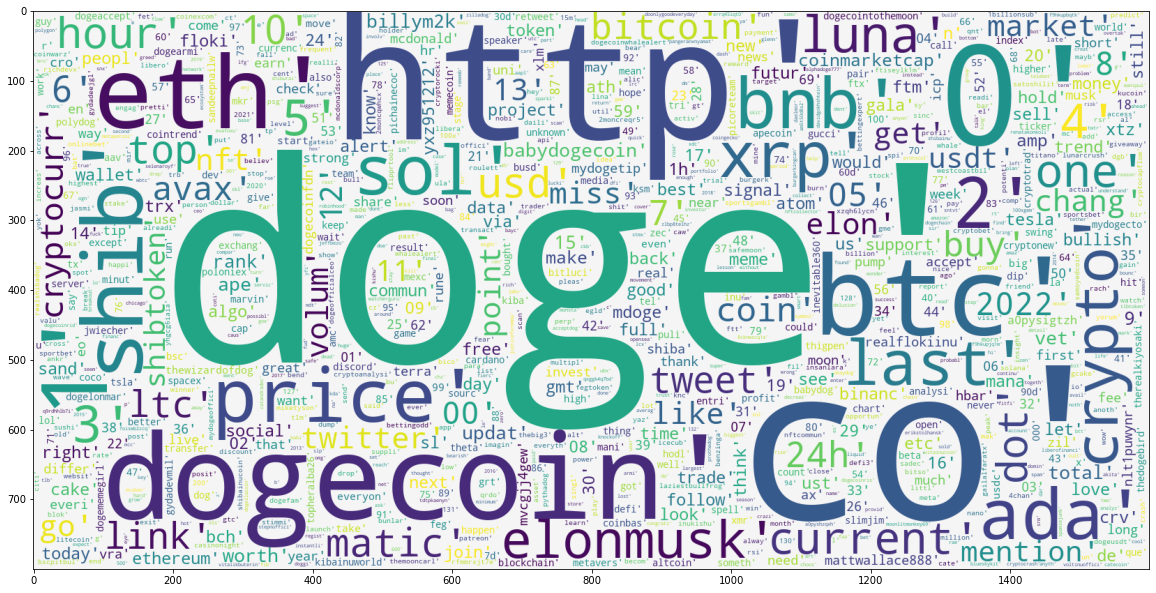

In [222]:
data_pos = data['cleaned'][:800000]
plt.figure(figsize = (20,20))
wc2 = WordCloud(max_words = 1000 , background_color='whitesmoke',width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc2)
plt.savefig("images/doge_pos_word.png")

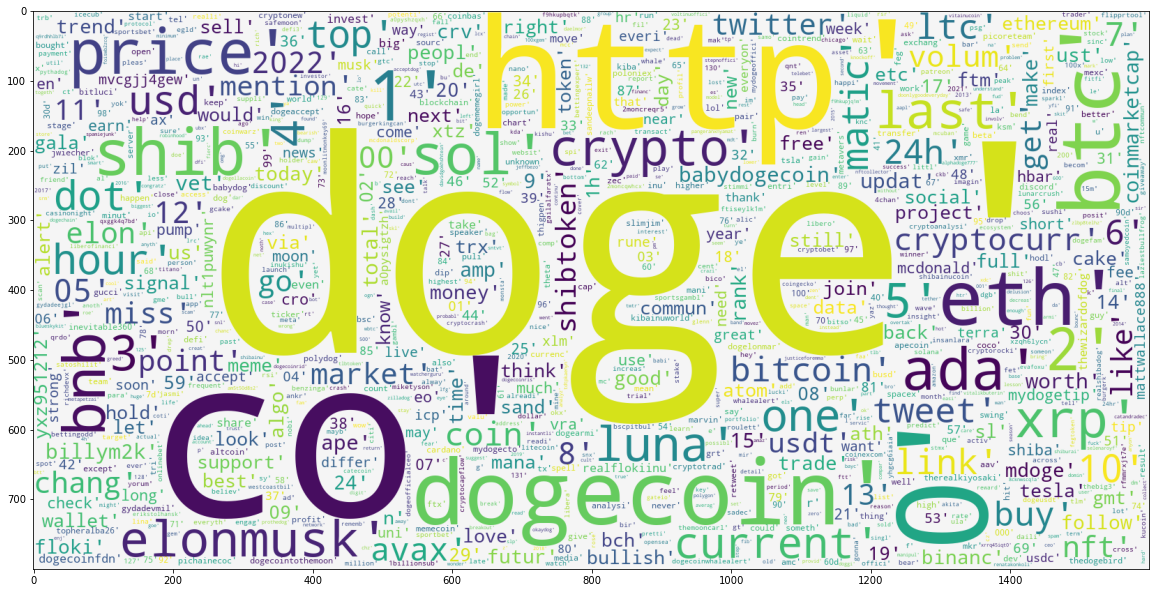

In [223]:
data_neg = data['cleaned'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False, background_color = "whitesmoke").generate(" ".join(data_neg))
plt.imshow(wc)
plt.savefig("images/doge_neg_word.png")

In [224]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(target, target_names,test_size = 0.05, random_state = 42)

In [225]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=600000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  270020


In [199]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [200]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    sentiment = ['Negative','Neutral', 'Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, cmap = 'Blues', annot=True, fmt='d',
                xticklabels = sentiment, yticklabels = sentiment)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.96      0.26      0.41       291
           1       0.74      0.98      0.85      1019
           2       0.83      0.68      0.74       620

    accuracy                           0.77      1930
   macro avg       0.84      0.64      0.67      1930
weighted avg       0.80      0.77      0.75      1930



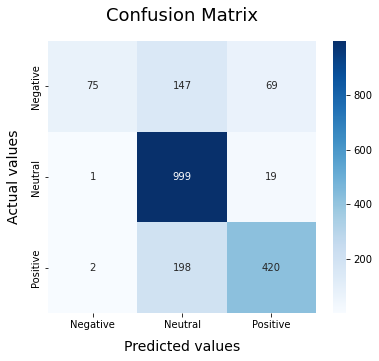

In [201]:
BNBmodel = BernoulliNB()
plt.figure(figsize = (6,5))
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
plt.savefig("images/doge_confusion.png")

# Sentiment vs Crypto Price analysis start here

In [19]:
doge

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp,sentiment
0,0,2022-05-01,"['btc', 'eth', 'doge', 'en', 'best', 'discord'...",0.078,0.578,0.344,0.8481,0
1,1,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'jamie...",0.000,1.000,0.000,0.0000,1
2,2,2022-05-01,"['1', 'eth', '1429', 'tweet', '2', 'btc', '103...",0.000,1.000,0.000,0.0000,1
3,3,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'carpe...",0.000,1.000,0.000,0.0000,1
4,4,2022-05-01,"['264', '600', '000', '000', 'x', '7', '55', '...",0.000,1.000,0.000,0.0000,1
...,...,...,...,...,...,...,...,...
38593,38593,2022-05-16,"['cb', 'doge', 'elonmusk', 'goal', 'one', 'day...",0.000,1.000,0.000,0.0000,1
38594,38594,2022-05-16,"['know', 'tough', 'dwac', 'tsla', 'bb', 'doge'...",0.176,0.824,0.000,-0.1280,0
38595,38595,2022-05-16,"['doge', '0', '09311', '0', '09201', '0', '089...",0.000,1.000,0.000,0.0000,1
38596,38596,2022-05-16,"['btc', 'price', '31', '319', 'eth', 'price', ...",0.000,1.000,0.000,0.0000,1


In [20]:
crypto

,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,date,bitcoin_volume,ethereum_volume,dogecoin_volume,Change DOGE,Doge Up/Down
0,0,14884.979992,328.653136,0.003901,2020-05-19,5.967659e+10,2.045635e+10,3.159139e+08,NaN,0
1,1,14922.865925,326.538524,0.003891,2020-05-20,5.668974e+10,1.561838e+10,1.867668e+08,-0.000009,0
2,2,14452.798040,318.473767,0.003781,2020-05-21,5.283982e+10,1.582295e+10,1.764923e+08,-0.000111,0
3,3,13795.940128,302.899061,0.003681,2020-05-22,5.476526e+10,1.234986e+10,2.064283e+08,-0.000099,0
4,4,13971.494350,315.525952,0.003858,2020-05-23,4.238211e+10,1.627442e+10,2.184323e+08,0.000176,1
...,...,...,...,...,...,...,...,...,...,...
725,725,42267.741872,2898.843244,0.127568,2022-05-14,1.031672e+11,3.457985e+10,1.679408e+09,0.006748,1
726,726,43534.739233,2976.736395,0.129823,2022-05-15,3.714673e+10,2.075952e+10,9.658377e+08,0.002255,1
727,727,45069.769903,3089.689306,0.134079,2022-05-16,3.302329e+10,2.071565e+10,7.538429e+08,0.004257,1
728,728,42910.751665,2905.144652,0.126187,2022-05-17,4.075195e+10,2.877878e+10,7.785160e+08,-0.007892,0


In [21]:
doge_sentiment = doge.groupby('date')['sentiment'].mean()
doge_sentiment = doge_sentiment.reset_index()
doge_sentiment

,date,sentiment
0,2022-05-01,1.183859
1,2022-05-02,1.180728
2,2022-05-03,1.198509
3,2022-05-04,1.195354
4,2022-05-05,1.198593
5,2022-05-06,1.212926
6,2022-05-07,1.248668
7,2022-05-08,1.221366
8,2022-05-09,1.165517
9,2022-05-10,1.170865


In [22]:
doge_price_sen = pd.merge(doge_sentiment, crypto,how='outer', on='date')

In [23]:
doge_clean1 = doge_price_sen.dropna(subset=['sentiment'])

In [24]:
doge_clean1.head()

,date,sentiment,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,bitcoin_volume,ethereum_volume,dogecoin_volume,Change DOGE,Doge Up/Down
0,2022-05-01,1.183859,712,53518.018858,3874.650573,0.180779,2.965347e+10,1.785574e+10,1.206468e+09,-0.010366,0
1,2022-05-02,1.180728,713,54531.860549,4008.085357,0.188247,3.517429e+10,2.050259e+10,1.306821e+09,0.007468,1
2,2022-05-03,1.198509,714,54709.645087,4059.288782,0.186066,4.231498e+10,2.511270e+10,1.018619e+09,-0.002181,0
3,2022-05-04,1.195354,715,53180.614016,3921.344785,0.182778,3.249291e+10,1.806705e+10,7.256790e+08,-0.003288,0
4,2022-05-05,1.198593,716,54702.555595,4053.948028,0.187391,4.374783e+10,2.388912e+10,1.048635e+09,0.004613,1


<Figure size 720x720 with 0 Axes>

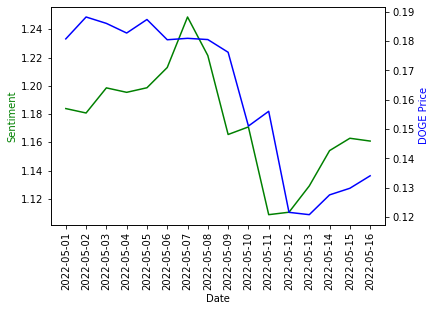

In [30]:
x = doge_clean1["date"]
y1 = doge_clean1["sentiment"]
y2 = doge_clean1["dogecoin_price"]
plt.figure(figsize = (10,10))
fig, ax1 = plt.subplots()
plt.xticks(rotation = 90)
ax2 = ax1.twinx()


ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('DOGE Price', color='b')

plt.savefig("images/doge_sentiment_price.png", bbox_inches='tight')
plt.show()


In [232]:
doge

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp,sentiment
0,0,2022-05-01,"['btc', 'eth', 'doge', 'en', 'best', 'discord'...",0.078,0.578,0.344,0.8481,0
1,1,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'jamie...",0.000,1.000,0.000,0.0000,1
2,2,2022-05-01,"['1', 'eth', '1429', 'tweet', '2', 'btc', '103...",0.000,1.000,0.000,0.0000,1
3,3,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'carpe...",0.000,1.000,0.000,0.0000,1
4,4,2022-05-01,"['264', '600', '000', '000', 'x', '7', '55', '...",0.000,1.000,0.000,0.0000,1
...,...,...,...,...,...,...,...,...
38593,38593,2022-05-16,"['cb', 'doge', 'elonmusk', 'goal', 'one', 'day...",0.000,1.000,0.000,0.0000,1
38594,38594,2022-05-16,"['know', 'tough', 'dwac', 'tsla', 'bb', 'doge'...",0.176,0.824,0.000,-0.1280,0
38595,38595,2022-05-16,"['doge', '0', '09311', '0', '09201', '0', '089...",0.000,1.000,0.000,0.0000,1
38596,38596,2022-05-16,"['btc', 'price', '31', '319', 'eth', 'price', ...",0.000,1.000,0.000,0.0000,1


In [233]:
doge_pos_avg = doge.groupby('date')['positive'].mean()
doge_pos_avg = doge_pos_avg.reset_index()
doge_pos_avg

,date,positive
0,2022-05-01,0.076760
1,2022-05-02,0.070194
2,2022-05-03,0.075173
3,2022-05-04,0.083141
4,2022-05-05,0.077009
5,2022-05-06,0.080106
6,2022-05-07,0.080135
7,2022-05-08,0.078419
8,2022-05-09,0.079586
9,2022-05-10,0.070076


In [234]:
doge_neg_avg = doge.groupby('date')['negative'].mean()
doge_neg_avg = doge_neg_avg.reset_index()
doge_neg_avg

,date,negative
0,2022-05-01,0.025886
1,2022-05-02,0.022510
2,2022-05-03,0.023598
3,2022-05-04,0.025564
4,2022-05-05,0.022547
5,2022-05-06,0.020917
6,2022-05-07,0.020178
7,2022-05-08,0.022205
8,2022-05-09,0.028681
9,2022-05-10,0.022406


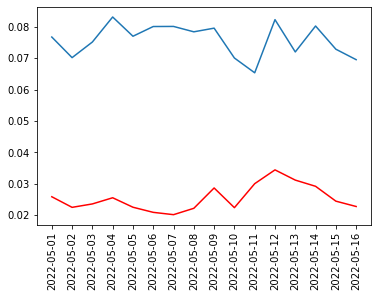

<Figure size 1440x1440 with 0 Axes>

In [235]:
plt.plot(doge_pos_avg['date'],doge_pos_avg["positive"], linestyle = 'solid')
plt.plot(doge_neg_avg['date'],doge_neg_avg["negative"], linestyle = 'solid', color = "red")
plt.xticks(rotation = 90)
plt.figure(figsize = (20,20))
#plt.savefig("test.png")
plt.show()

In [26]:
doge = doge_price_sen[(doge_price_sen['date'] > '2022-04-30') & (doge_price_sen['date'] < '2022-05-16')]
doge

,date,sentiment,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,bitcoin_volume,ethereum_volume,dogecoin_volume,Change DOGE,Doge Up/Down
0,2022-05-01,1.183859,712,53518.018858,3874.650573,0.180779,2.965347e+10,1.785574e+10,1.206468e+09,-0.010366,0
1,2022-05-02,1.180728,713,54531.860549,4008.085357,0.188247,3.517429e+10,2.050259e+10,1.306821e+09,0.007468,1
2,2022-05-03,1.198509,714,54709.645087,4059.288782,0.186066,4.231498e+10,2.511270e+10,1.018619e+09,-0.002181,0
3,2022-05-04,1.195354,715,53180.614016,3921.344785,0.182778,3.249291e+10,1.806705e+10,7.256790e+08,-0.003288,0
4,2022-05-05,1.198593,716,54702.555595,4053.948028,0.187391,4.374783e+10,2.388912e+10,1.048635e+09,0.004613,1
5,2022-05-06,1.212926,717,51400.311798,3866.281839,0.180483,5.250914e+10,2.929791e+10,1.573665e+09,-0.006909,0
6,2022-05-07,1.248668,718,51026.289235,3814.224690,0.180969,4.552599e+10,2.898637e+10,1.233530e+09,0.000487,1
7,2022-05-08,1.221366,719,50259.004275,3731.605078,0.180549,2.702844e+10,1.770002e+10,1.007459e+09,-0.000420,0
8,2022-05-09,1.165517,720,48329.555540,3571.264784,0.176215,4.370554e+10,2.919468e+10,9.566095e+08,-0.004335,0
9,2022-05-10,1.170865,721,43512.077206,3234.184510,0.151046,8.390590e+10,4.943897e+10,1.727538e+09,-0.025168,0


<Figure size 432x288 with 0 Axes>

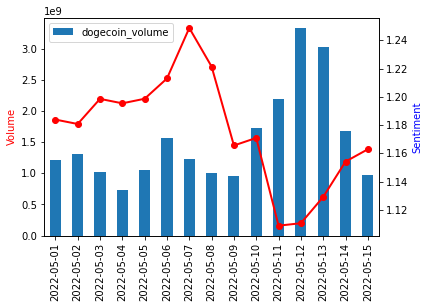

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = doge[['dogecoin_volume']].plot(kind='bar', use_index=True)
ax2 = ax.twinx()
# ax.set_yticklabels(btc['bitcoin_volume'])
ax.set_ylabel('Volume', color='r')
ax2.set_ylabel('Sentiment', color='b')


ax.set_xticklabels(doge['date'], rotation=90)
ax2.plot(doge[['sentiment']].values, linestyle='-', marker='o', linewidth=2.0, color="red")
plt.savefig("images/dogevolume.png", bbox_inches='tight')